<a href="https://colab.research.google.com/github/shuklasid19/Assignment/blob/main/bankbalance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import the libraries 
# and reading the dataset 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

#read the data
df = pd.read_csv('https://raw.githubusercontent.com/analyticsindiamagazine/MocksDatasets/main/Credit_Card.csv')

In [2]:
#top most points in our data set
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
#gives information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [4]:
#describes the dataset
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [5]:
#shape of the dataset
#we have 30000 rows and 25 features 1 of them is target variable 
df.shape

(30000, 25)

In [6]:
#no missing values it seems 
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [7]:
#names of columns in our dataset
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [8]:
#its id so we will drop the feature
df['ID']

0            1
1            2
2            3
3            4
4            5
         ...  
29995    29996
29996    29997
29997    29998
29998    29999
29999    30000
Name: ID, Length: 30000, dtype: int64

In [22]:
df = df.rename(columns = {'default.payment.next.month': 'def_pay',
                          'PAY_0': 'PAY_1'})

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Limit bal')

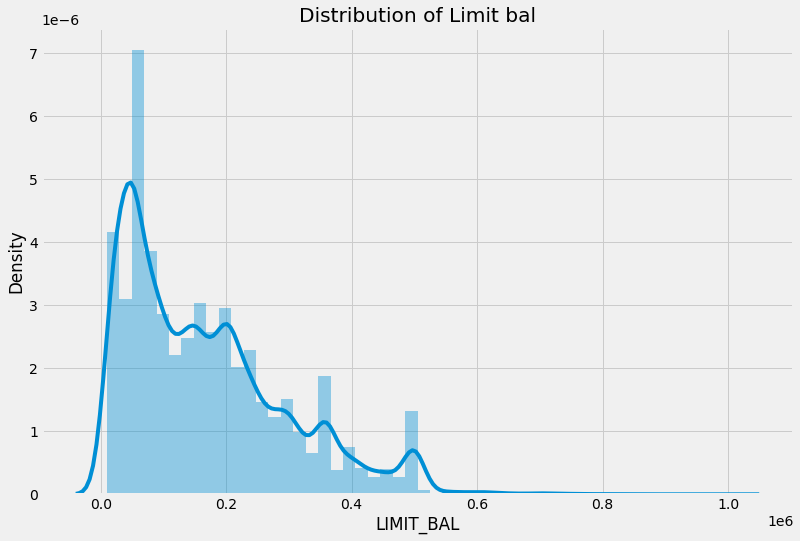

In [23]:
#limit bal distribution
plt.figure(figsize=(12, 8))
plt.style.use('fivethirtyeight')
sns.distplot(df['LIMIT_BAL'])
plt.title("Distribution of Limit bal")

#our limit bal is right skewed 

In [41]:
df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

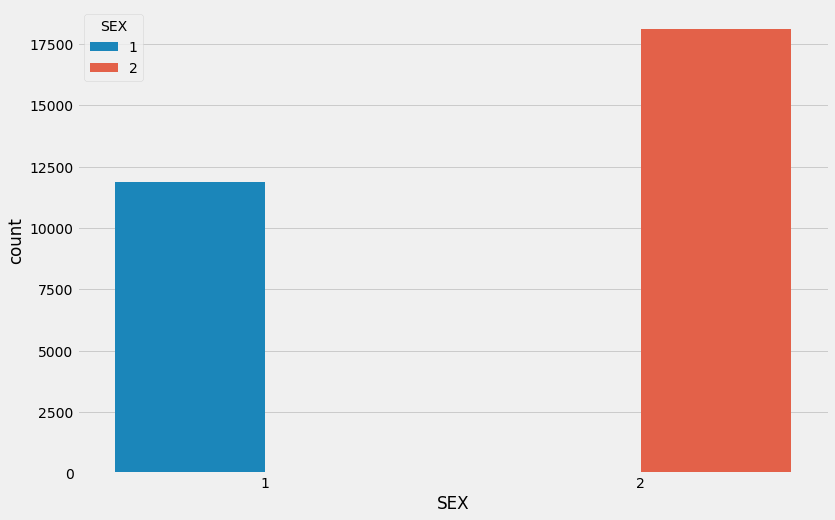

In [10]:
plt.figure(figsize=(12, 8))
plt.style.use('fivethirtyeight')
sns.countplot(x='SEX',data=df,hue = 'SEX')

In [42]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

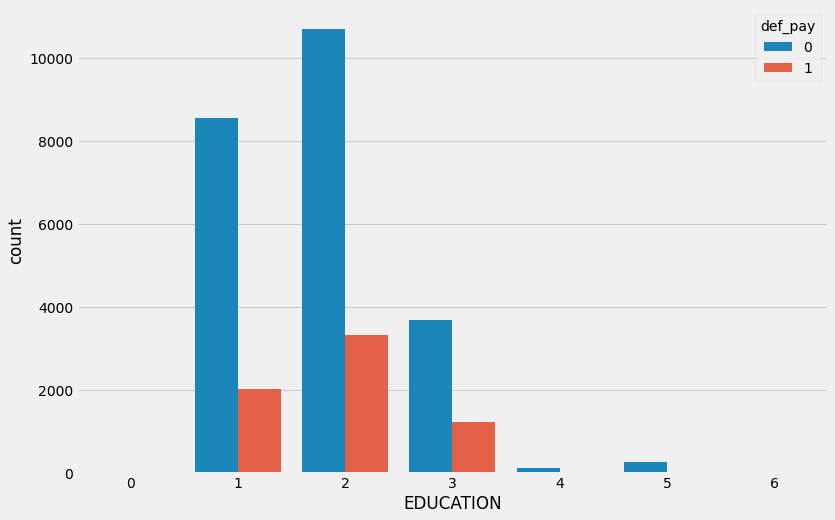

In [24]:
plt.figure(figsize=(12, 8))
plt.style.use('fivethirtyeight')
sns.countplot(x="EDUCATION", data=df,hue="def_pay")

#it appears that 4 and 5 are missing 0, 6 dont have any points 

In [25]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


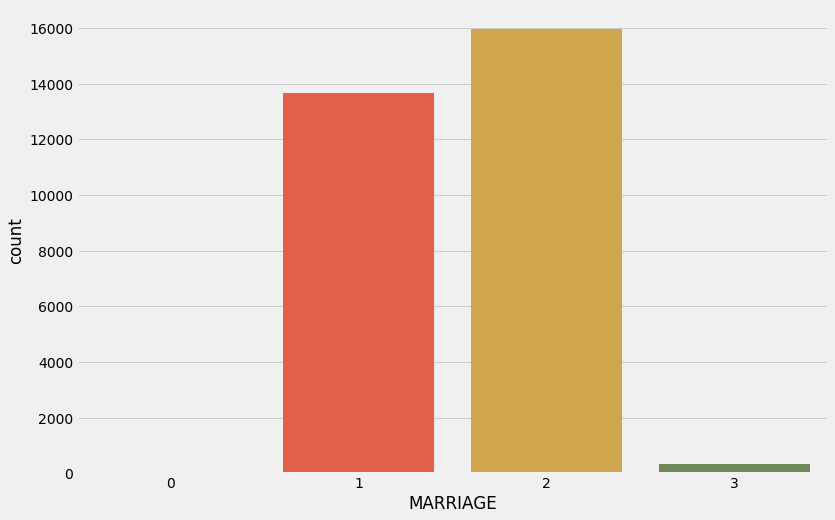

In [26]:
plt.figure(figsize=(12, 8))
plt.style.use('fivethirtyeight')
sns.countplot(df['MARRIAGE'])

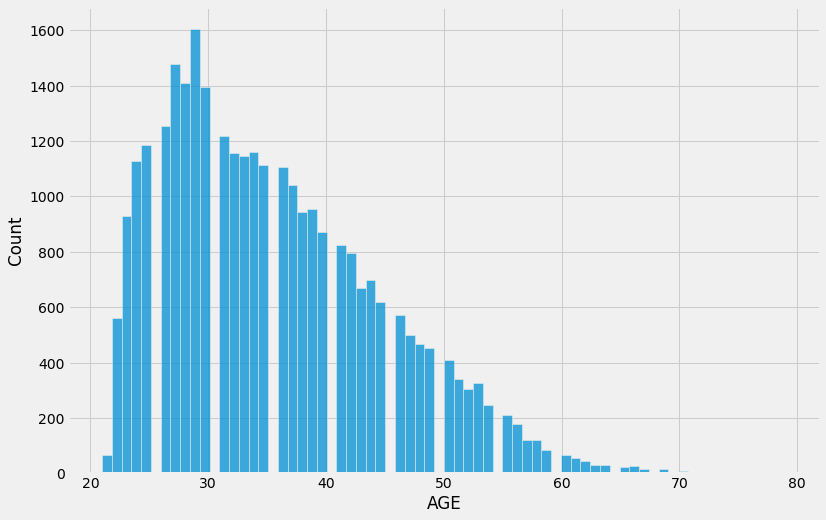

In [14]:
plt.figure(figsize=(12, 8))
plt.style.use('fivethirtyeight')
sns.histplot(df['AGE'])

In [ ]:
#most people are young and as age increases the number decreases
#distrubution is righly skewed.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


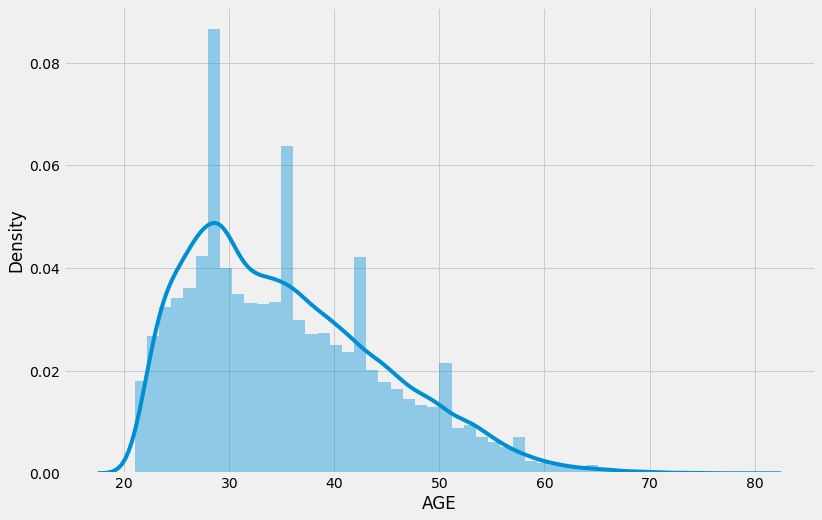

In [15]:
plt.figure(figsize=(12, 8))
plt.style.use('fivethirtyeight')
sns.distplot(df['AGE'])

Text(0.5, 1.0, 'Default Credit Card Clients - target value - data unbalance\n (Default = 0, Not Default = 1')

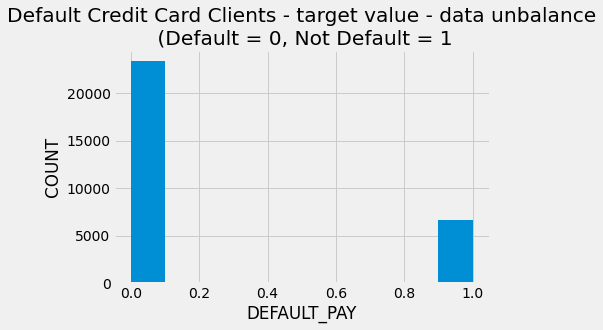

In [27]:
plt.style.use('fivethirtyeight')
df['def_pay'].hist()
plt.xlabel('DEFAULT_PAY')
plt.ylabel('COUNT')
plt.title('Default Credit Card Clients - target value - data unbalance\n (Default = 0, Not Default = 1')

Our target is imbalanced

In [28]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'def_pay'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

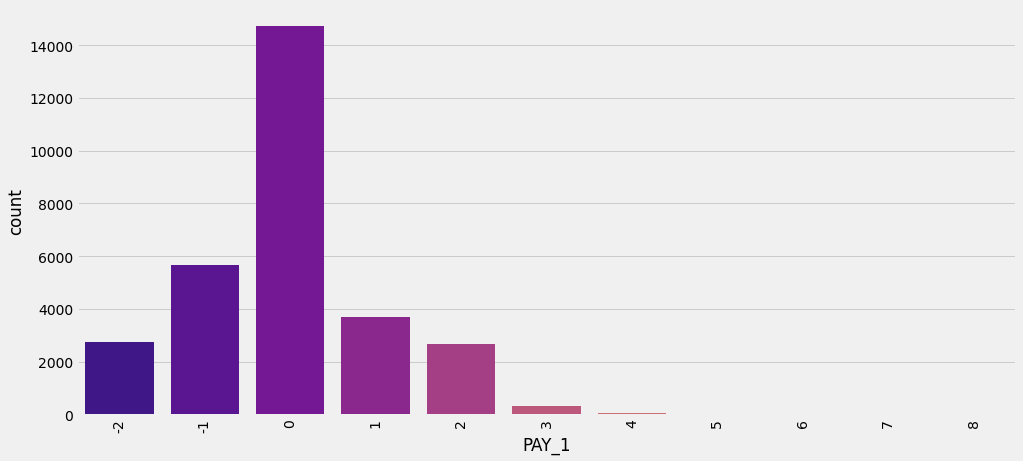

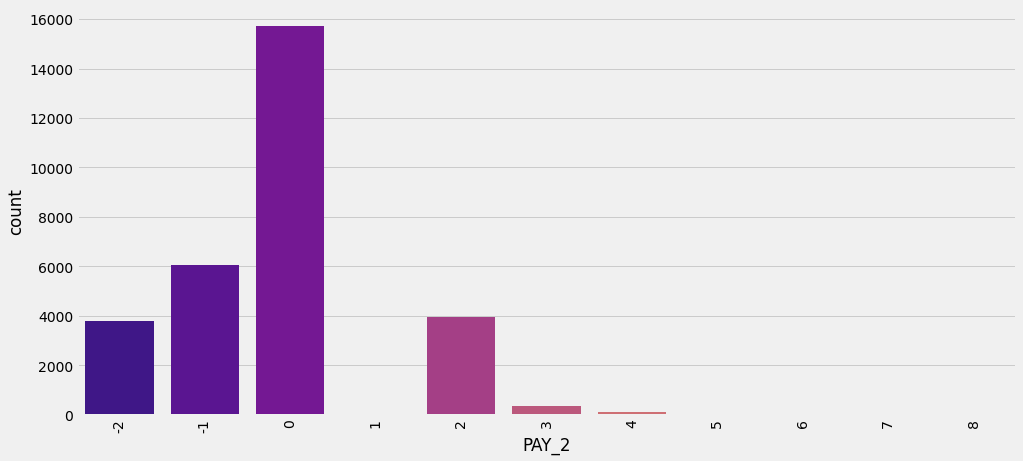

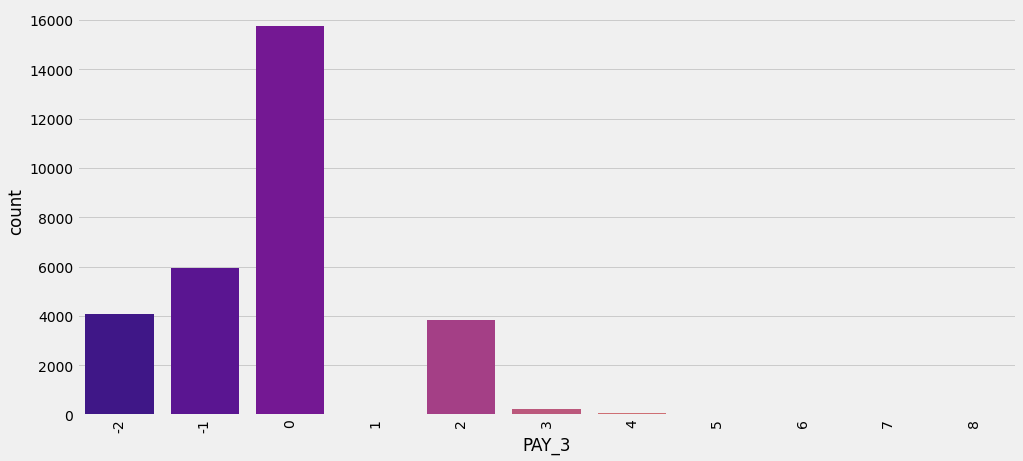

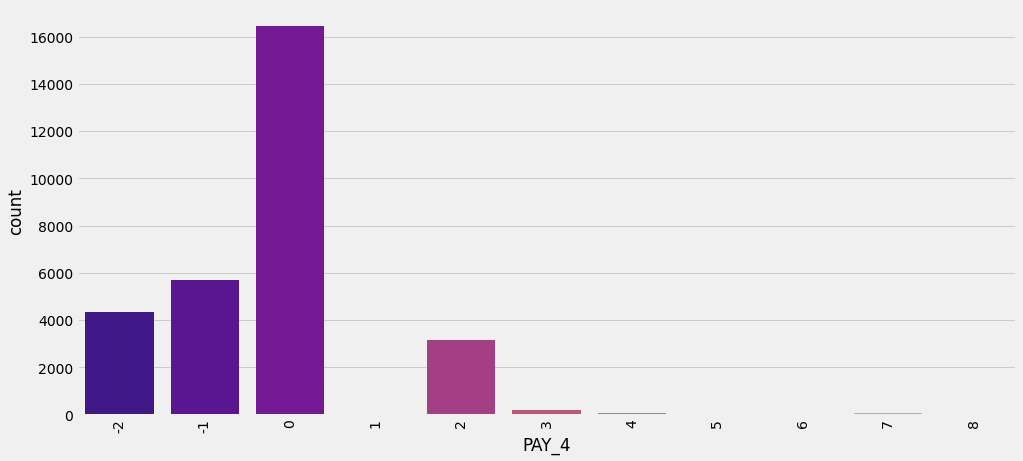

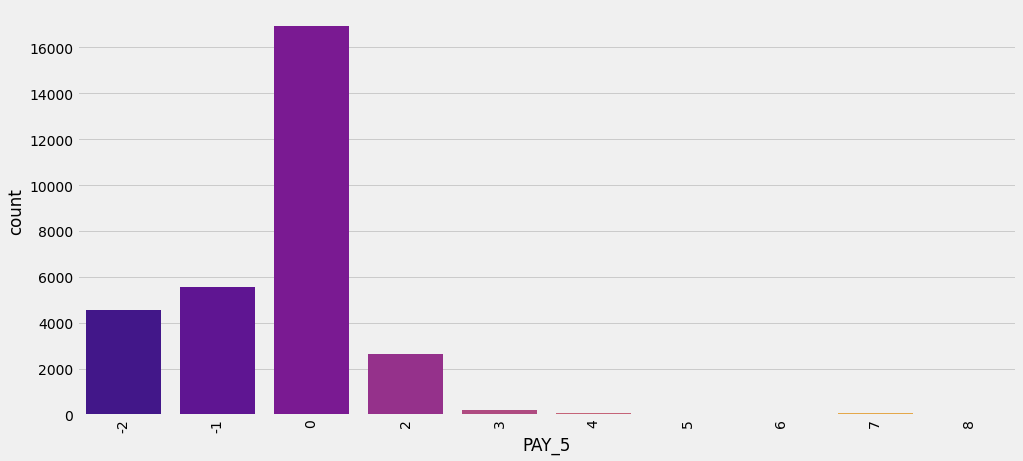

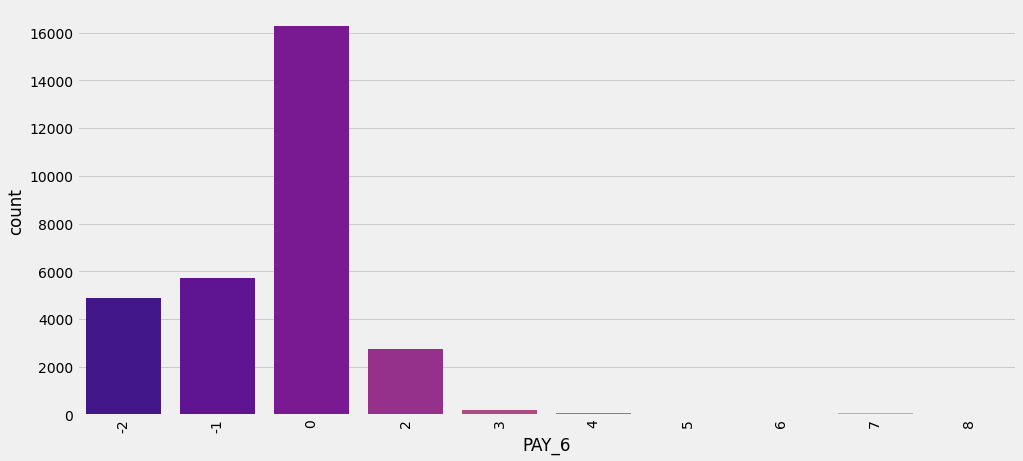

In [30]:
## plotting countplots for the categorical variables

def drawplot(col):
    plt.figure(figsize=(15,7))
    sns.countplot(df[col],palette='plasma')
    plt.xticks(rotation='vertical')
    
toview = ['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for col in toview:
    drawplot(col)



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

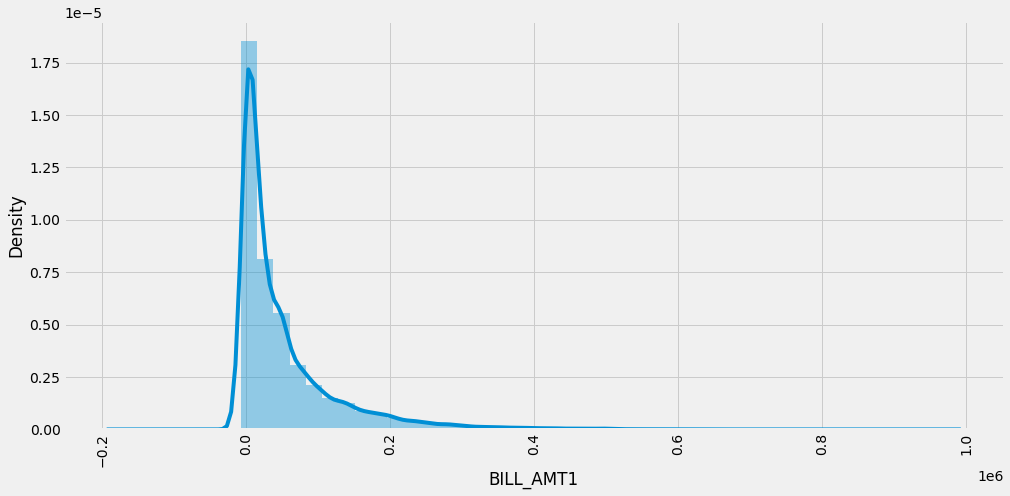

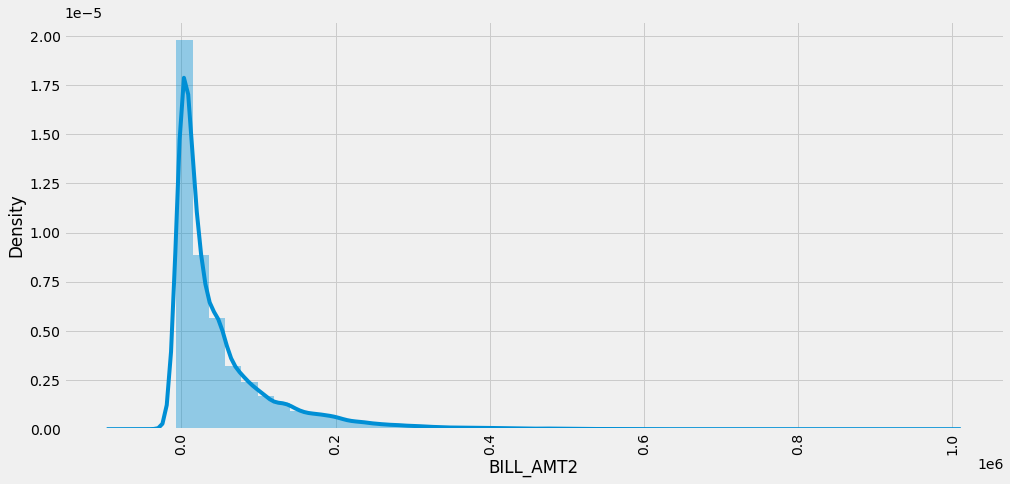

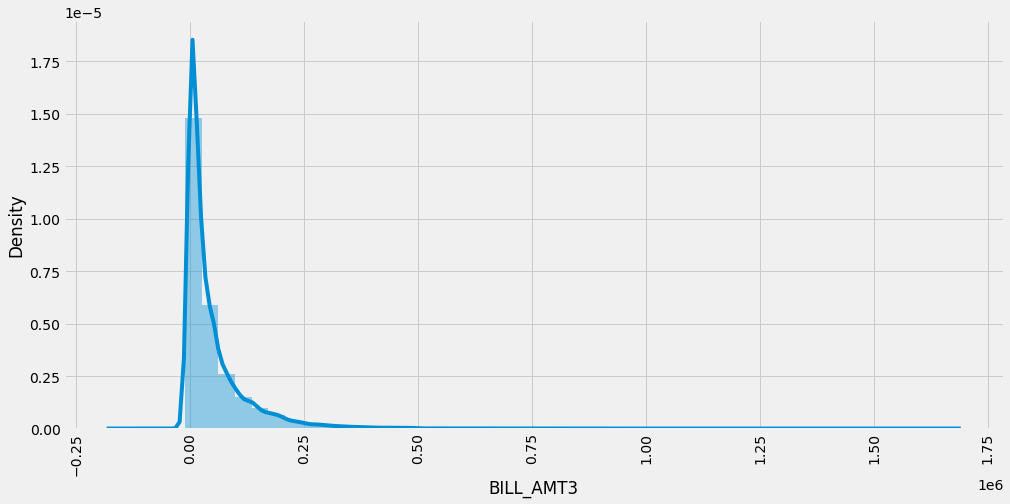

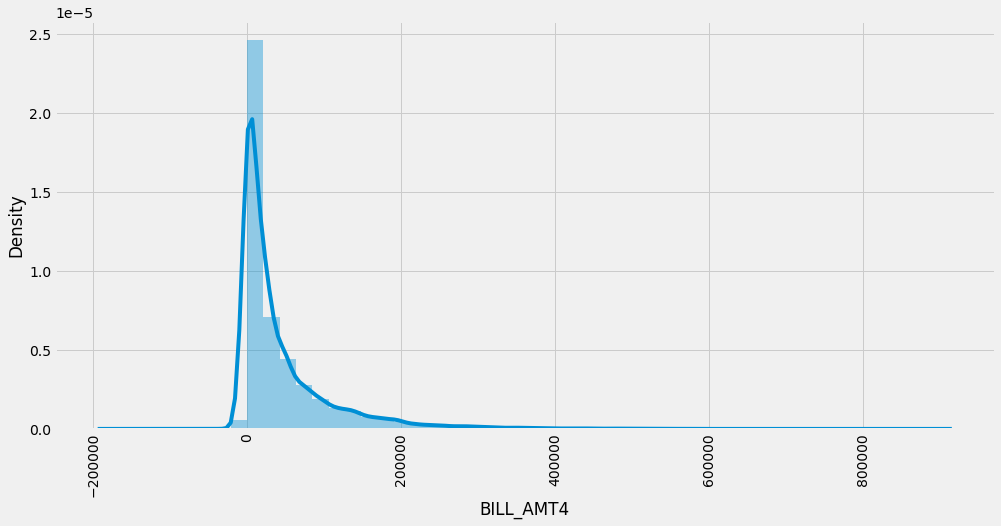

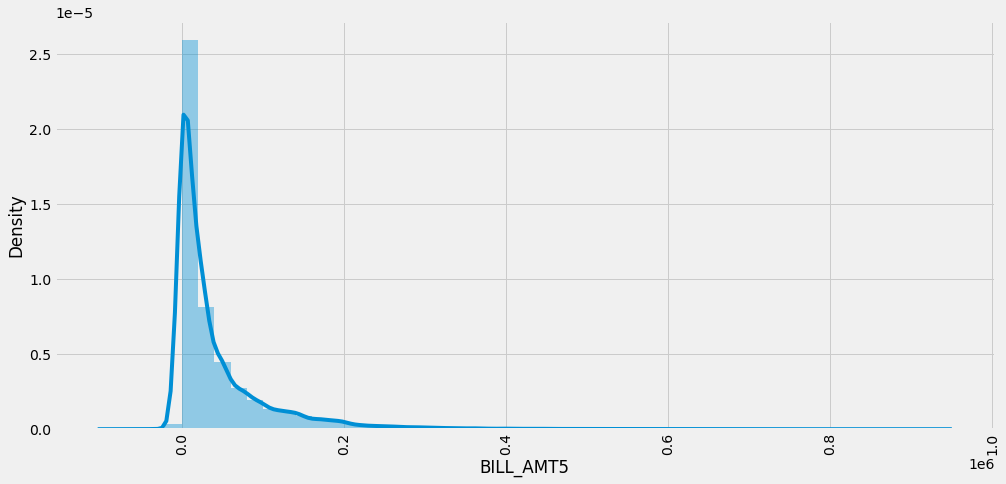

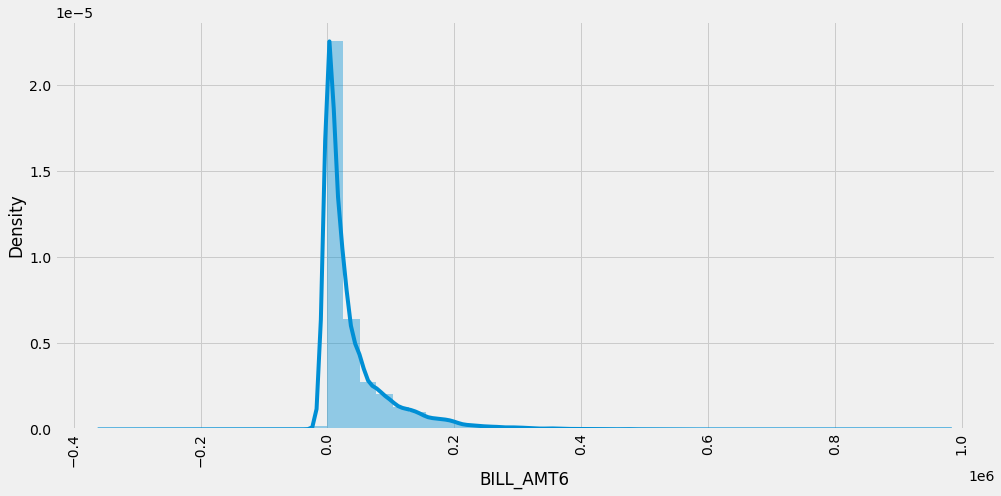

In [33]:
def drawplot(col):
    plt.figure(figsize=(15,7))
    sns.distplot(df[col])
    plt.xticks(rotation='vertical')
    
toview = ['BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
for col in toview:
    drawplot(col)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

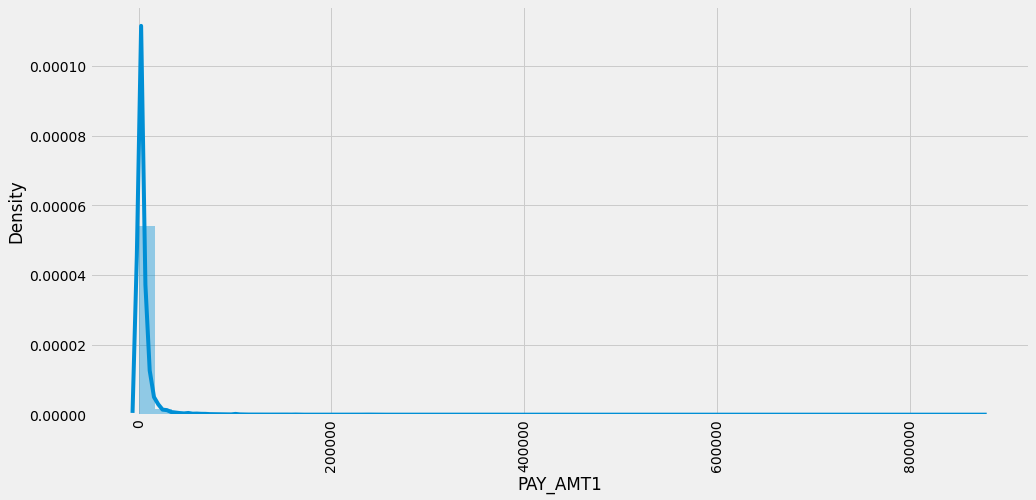

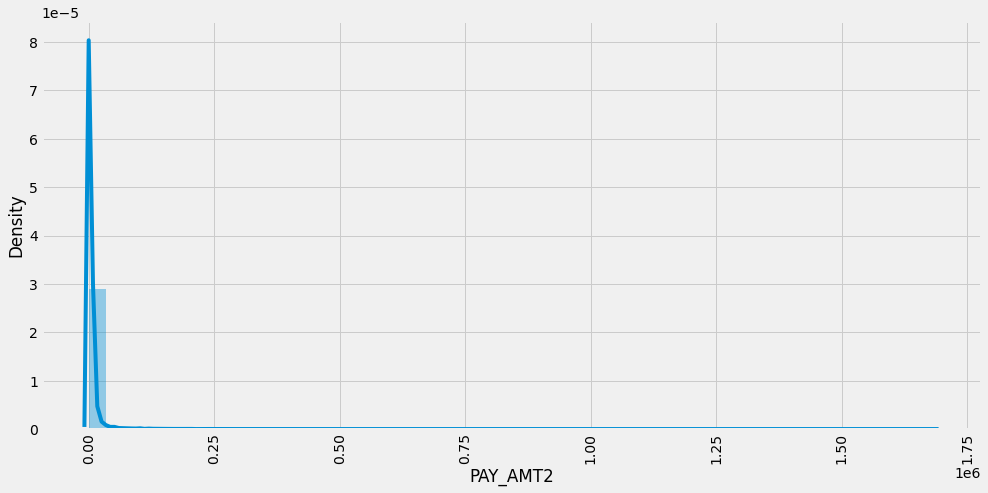

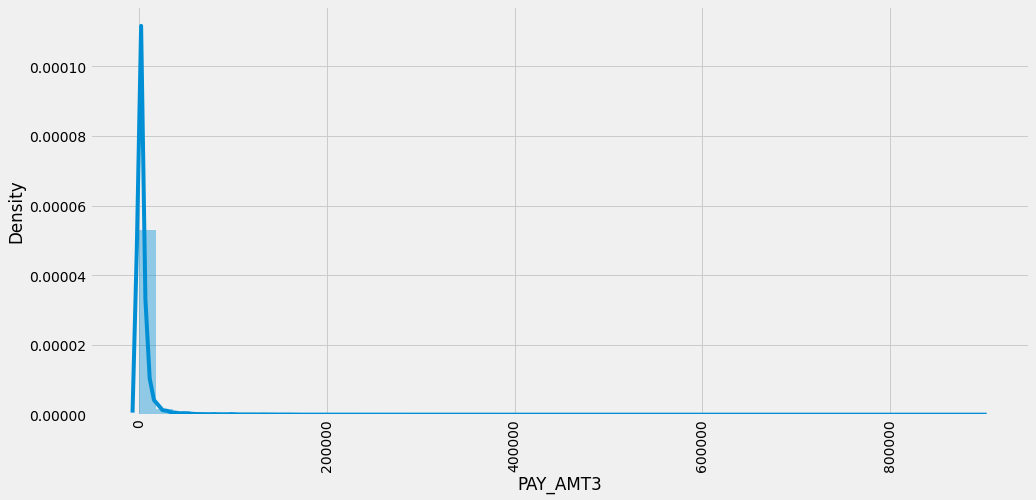

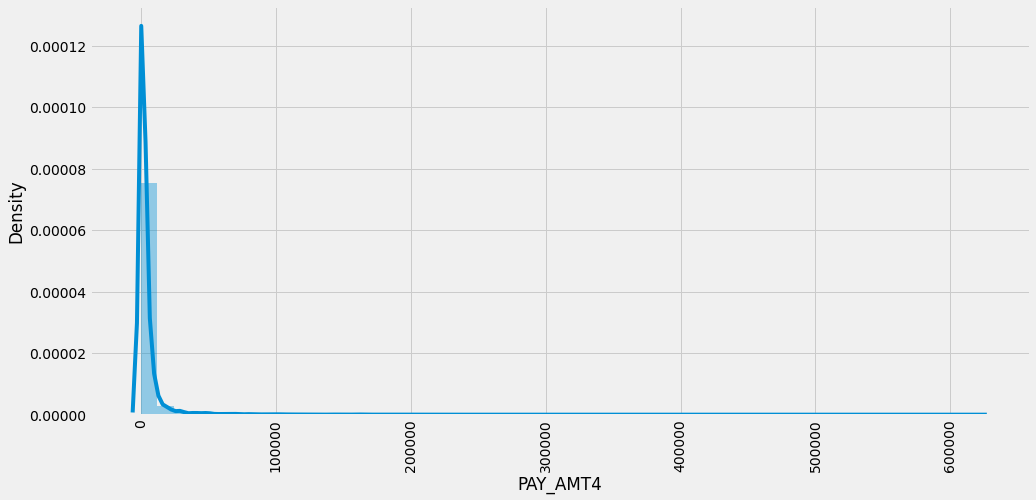

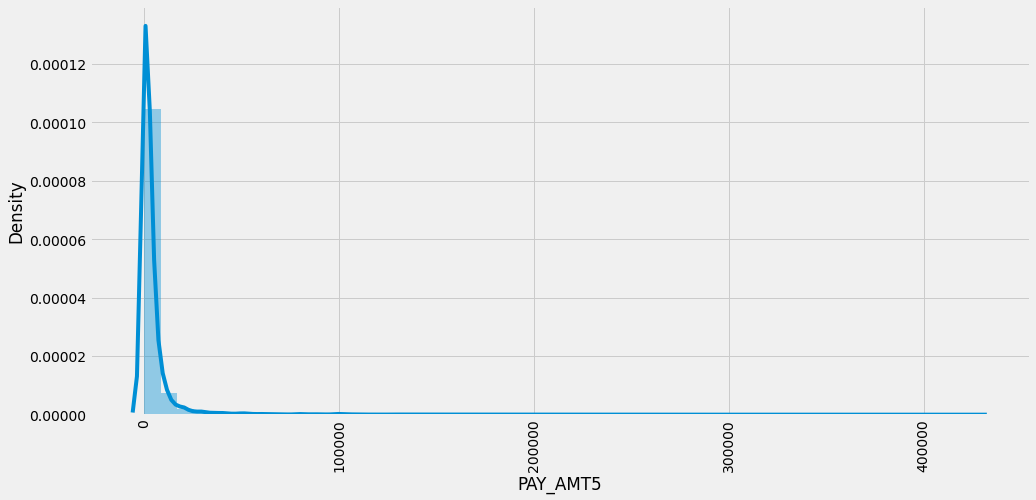

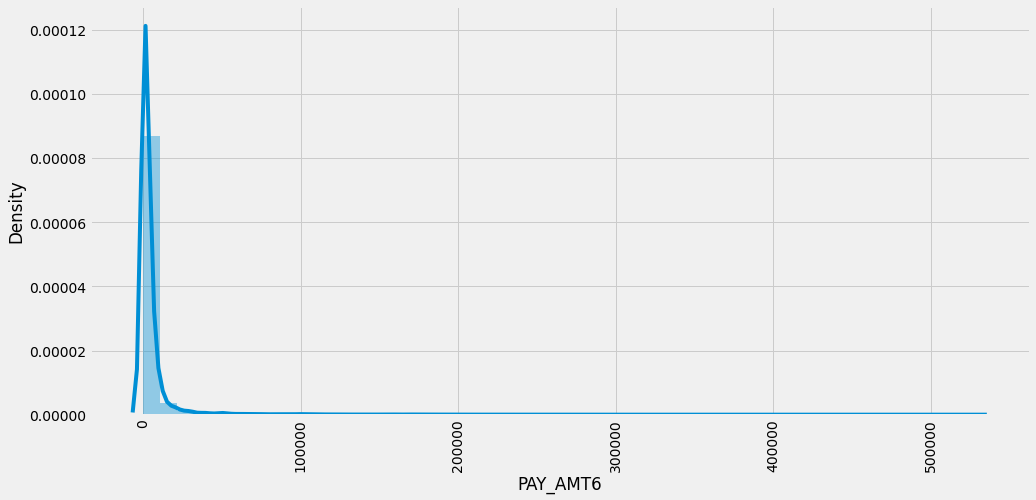

In [36]:
def drawplot(col):
    plt.style.use('fivethirtyeight')
    plt.figure(figsize=(15,7))
    sns.distplot(df[col])
    plt.xticks(rotation='vertical')
    
toview = [ 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
for col in toview:
    drawplot(col)


In [29]:
#! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

In [20]:
def getColumnsNames(prefix):
    return [prefix+str(x) for x in range(1,7)]

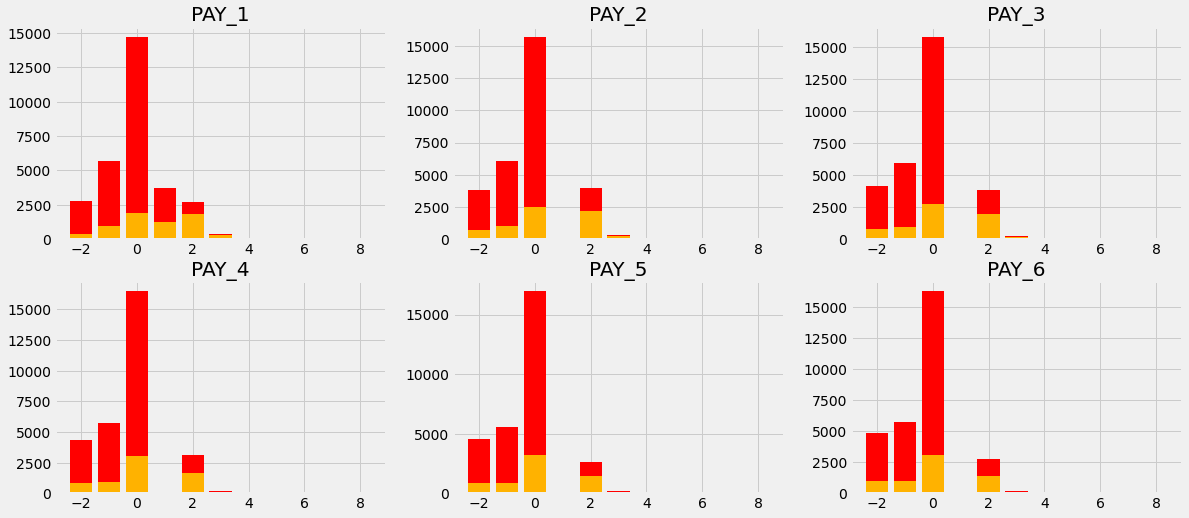

<Figure size 864x576 with 0 Axes>

In [41]:
# PAY_1 , PAY_2 , PAY_3 , PAY_4 , PAY_5, PAY_6
pay_status_columns = getColumnsNames('PAY_')

figure, ax = plt.subplots(2,3)
plt.figure(figsize=(12 , 8))
figure.set_size_inches(18,8)


for i in range(len(pay_status_columns)):
    row,col = int(i/3), i%3

    d  = df[pay_status_columns[i]].value_counts()
    x = df[pay_status_columns[i]][(df['def_pay']==1)].value_counts()
    ax[row,col].bar(d.index, d, align='center', color='red')
    ax[row,col].bar(x.index, x, align='center', color='yellow', alpha=0.7)
    ax[row,col].set_title(pay_status_columns[i])
   


    
plt.show()

In [ ]:
sns.distplot(df['PAY_AMT1'])

In [18]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [ ]:
sns.distplot(df['PAY_AMT6'])

In [ ]:
sns.countplot(df['default.payment.next.month'])

In [ ]:
profile = ProfileReport(df, title="data set", html={'style' : {'full_width':True}})

In [33]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [182]:
df.drop('ID', axis=1, inplace=True)

In [ ]:
sns.distplot(df['PAY_AMT3'])

In [36]:
df.shape

(30000, 24)

In [37]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [38]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [44]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'def_pay'],
      dtype='object')

Text(0.5, 1.0, 'SEX v/s COUNT')

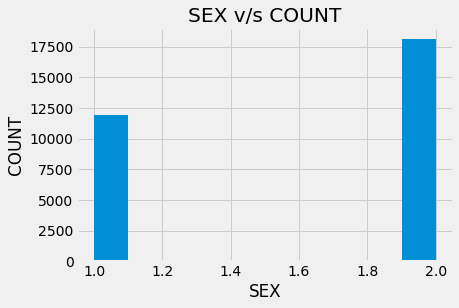

In [46]:
plt.style.use('fivethirtyeight')
df['SEX'].hist()
plt.xlabel('SEX')
plt.ylabel('COUNT')
plt.title('SEX v/s COUNT')

Number of Male credit holder is less than Female.

Text(0.5, 1.0, 'Default Credit Card Clients - target value - data unbalance\n (Default = 0, Not Default = 1)')

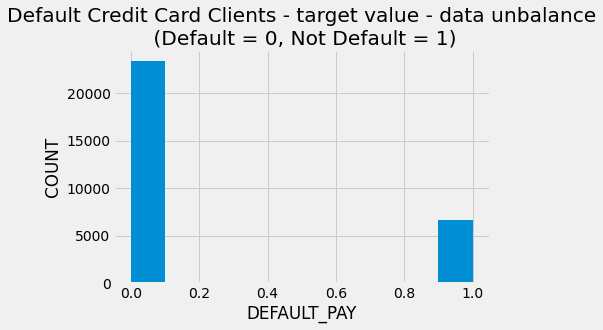

In [47]:
plt.style.use('fivethirtyeight')
df['def_pay'].hist()
plt.xlabel('DEFAULT_PAY')
plt.ylabel('COUNT')
plt.title('Default Credit Card Clients - target value - data unbalance\n (Default = 0, Not Default = 1)')

Percentage of Defaulters are smaller than the Non Defaulters in the given dataset

As we can see our dataset is imbalanced one class has more points then the other.


Text(0.5, 1.0, 'EDUCATION v/s COUNT')

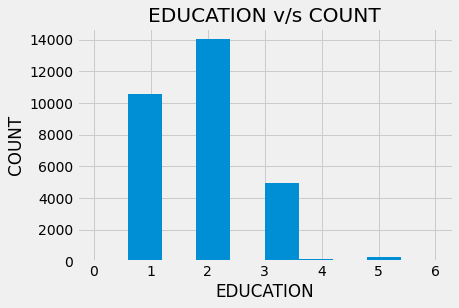

In [50]:
correlation = df.corr()

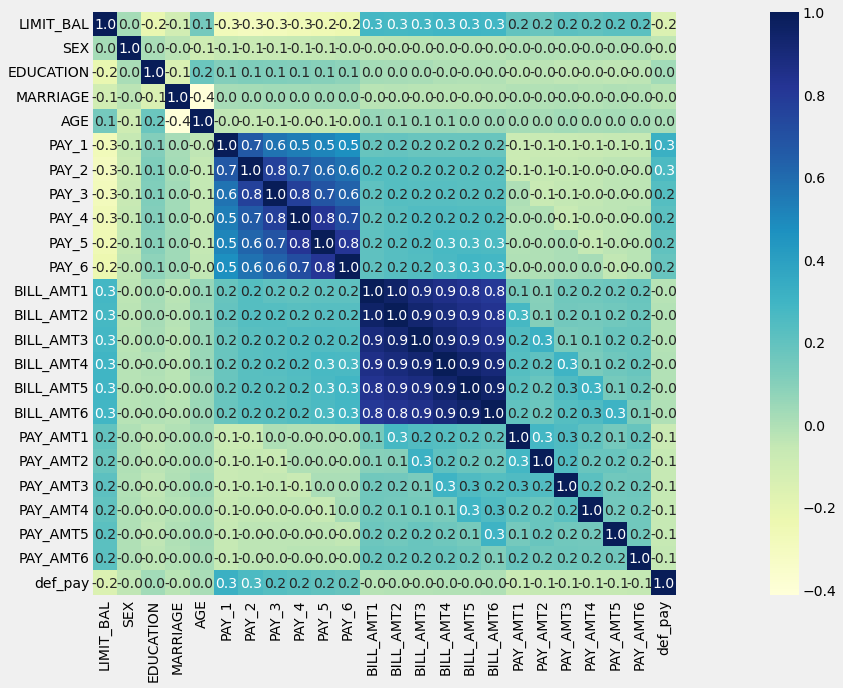

In [52]:
plt.subplots(figsize=(30 ,10))
sns.heatmap(correlation, square=True, annot=True, fmt='.1f',
            cmap="YlGnBu")

PAY_0, PAY_X variables are the strongest predictors of default, followed by the LIMIT_BAL and PAY_AMT_X variables.

<Figure size 864x576 with 0 Axes>

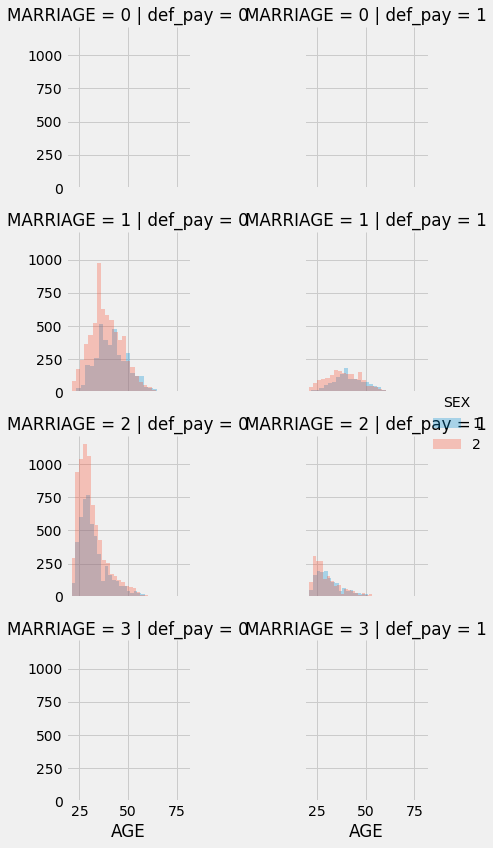

In [55]:
plt.figure(figsize=(12, 8))
g = sns.FacetGrid(df, col='def_pay', row= "MARRIAGE", hue='SEX')
g.map(plt.hist, 'AGE', alpha=0.3, bins=25) 
g.add_legend()

In [57]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


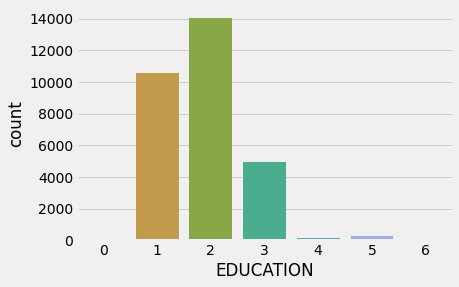

In [58]:
sns.countplot(df['EDUCATION'])

In [59]:
fil = (df.EDUCATION == 5) | (df.EDUCATION == 6) | (df.EDUCATION == 0)
df.loc[fil, 'EDUCATION'] = 4
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [63]:
df.loc[df.MARRIAGE == 0, 'MARRIAGE'] = 3
df.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [64]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [65]:
df.tail()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
29995,220000.0,1,3,1,39,0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,1,2,2,37,4,3,2,-1,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,1,3,1,41,1,-1,0,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1
29999,50000.0,1,2,1,46,0,0,0,0,0,...,36535.0,32428.0,15313.0,2078.0,1800.0,1430.0,1000.0,1000.0,1000.0,1


In [66]:
df['PAY_1']

0        2
1       -1
2        0
3        0
4       -1
        ..
29995    0
29996   -1
29997    4
29998    1
29999    0
Name: PAY_1, Length: 30000, dtype: int64

In [67]:
df['PAY_1'].describe()

count    30000.000000
mean        -0.016700
std          1.123802
min         -2.000000
25%         -1.000000
50%          0.000000
75%          0.000000
max          8.000000
Name: PAY_1, dtype: float64

In [184]:
val = (df.PAY_1==-1) | (df.PAY_1==-2)
#df.loc[val , 'PAY_1']=0


In [185]:
df.PAY_1.value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_1, dtype: int64

In [186]:
df.loc[val, 'PAY_1']=0

In [187]:
df.PAY_1.value_counts()

0    23182
1     3688
2     2667
3      322
4       76
5       26
8       19
6       11
7        9
Name: PAY_1, dtype: int64

In [188]:
val = (df.PAY_2 == -1) | (df.PAY_2==-2)
df.loc[val,'PAY_2']=0

df.PAY_2.value_counts()

0    25562
2     3927
3      326
4       99
1       28
5       25
7       20
6       12
8        1
Name: PAY_2, dtype: int64

In [189]:
val = (df.PAY_3 == -1) | (df.PAY_3==-2)
df.loc[val,'PAY_3']=0

df.PAY_3.value_counts()

0    25787
2     3819
3      240
4       76
7       27
6       23
5       21
1        4
8        3
Name: PAY_3, dtype: int64

In [190]:
val = (df.PAY_4 == -1) | (df.PAY_4==-2)
df.loc[val,'PAY_4']=0

df.PAY_4.value_counts()

0    26490
2     3159
3      180
4       69
7       58
5       35
6        5
1        2
8        2
Name: PAY_4, dtype: int64

In [191]:
val = (df.PAY_5 == -1) | (df.PAY_5==-2)
df.loc[val,'PAY_5']=0

df.PAY_5.value_counts()

0    27032
2     2626
3      178
4       84
7       58
5       17
6        4
8        1
Name: PAY_5, dtype: int64

In [192]:
val = (df.PAY_5 == -1) | (df.PAY_5==-2)
df.loc[val,'PAY_5']=0

df.PAY_5.value_counts()

0    27032
2     2626
3      178
4       84
7       58
5       17
6        4
8        1
Name: PAY_5, dtype: int64

In [193]:
val = (df.PAY_6 == -1) | (df.PAY_6==-2)
df.loc[val,'PAY_6']=0

df.PAY_6.value_counts()

0    26921
2     2766
3      184
4       49
7       46
6       19
5       13
8        2
Name: PAY_6, dtype: int64

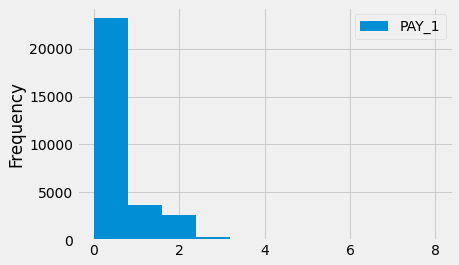

In [194]:
df.plot(y = 'PAY_1',kind='hist')
plt.legend()
plt.show()

In [195]:
df['PAY_1'].describe()

count    30000.000000
mean         0.356767
std          0.760594
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          8.000000
Name: PAY_1, dtype: float64

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  30000 non-null  float64
 1   SEX        30000 non-null  int64  
 2   EDUCATION  30000 non-null  int64  
 3   MARRIAGE   30000 non-null  int64  
 4   AGE        30000 non-null  int64  
 5   PAY_1      30000 non-null  int64  
 6   PAY_2      30000 non-null  int64  
 7   PAY_3      30000 non-null  int64  
 8   PAY_4      30000 non-null  int64  
 9   PAY_5      30000 non-null  int64  
 10  PAY_6      30000 non-null  int64  
 11  BILL_AMT1  30000 non-null  float64
 12  BILL_AMT2  30000 non-null  float64
 13  BILL_AMT3  30000 non-null  float64
 14  BILL_AMT4  30000 non-null  float64
 15  BILL_AMT5  30000 non-null  float64
 16  BILL_AMT6  30000 non-null  float64
 17  PAY_AMT1   30000 non-null  float64
 18  PAY_AMT2   30000 non-null  float64
 19  PAY_AMT3   30000 non-null  float64
 20  PAY_AM

2

In [86]:

df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [87]:

df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


In [88]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'def_pay'],
      dtype='object')

In [197]:
df.columns = df.columns.map(str.lower)

In [198]:
df.columns

Index(['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_1', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6', 'def_pay'],
      dtype='object')

In [199]:
col_to_norm = ['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_1', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6']

In [200]:
import numpy as np
df[col_to_norm] = df[col_to_norm].apply(lambda x: (x-np.mean(x))/np.std(x))

In [230]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)

In [231]:
pd.value_counts(df.iloc[:, -1])

0    23364
1     6636
Name: def_pay, dtype: int64

In [232]:
x_train.shape

(21000, 23)

In [233]:
x_test.shape

(9000, 23)

In [102]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(random_state=5)
logmodel.fit(x_train, y_train)

LogisticRegression(random_state=5)

In [103]:
y_pred = logmodel.predict(x_test)

In [104]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc = roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec  = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


In [105]:
results = pd.DataFrame([['Logistic Regression', acc,prec,rec, f1,roc]],
                      columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.815333,0.680556,0.3185,0.433924,0.637893


In [153]:
from sklearn.decomposition import PCA
log_reg1 = LogisticRegression()
f1_score = []

pca = PCA(n_components=0.95)
x_train_pc = pca.fit_transform(x_train)

In [154]:
x_train_pc.shape

(21000, 16)

In [155]:
pca.explained_variance_ratio_

array([0.2575471 , 0.17367341, 0.07259071, 0.06617773, 0.04694623,
       0.04431165, 0.042357  , 0.03941389, 0.03788811, 0.03474655,
       0.03282533, 0.02866558, 0.02617078, 0.02332699, 0.02148486,
       0.0146722 ])

In [156]:
# View first 5 rows of all principal components
pd.DataFrame(pca.components_.T).loc[:4,:]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.167006,-0.142732,0.235139,0.097746,-0.508101,0.052698,-0.053990,-0.127373,-0.011238,0.010176,0.040062,0.071875,-0.547618,-0.539317,0.079003,0.044512
1,-0.010441,-0.033106,0.000199,-0.069659,0.017167,0.968101,0.076094,-0.098408,0.004344,-0.025628,0.001678,-0.005624,-0.092020,0.174733,-0.024103,-0.005158
2,-0.012685,0.053148,-0.191197,0.363727,0.634791,0.086855,0.142396,0.342413,-0.023843,0.153407,0.098938,0.042482,-0.305430,-0.380993,0.063712,0.023848
3,-0.020295,-0.000301,0.016592,-0.636070,0.176086,-0.159417,0.063683,0.120221,-0.022727,0.055135,0.051076,0.013214,-0.637607,0.326365,0.015734,-0.005515
4,0.032128,-0.005255,-0.007514,0.663077,-0.123620,-0.098170,-0.064544,-0.035197,-0.000432,-0.049641,-0.010842,-0.032488,-0.375086,0.619027,-0.035948,-0.007035


In [157]:
# Loop through different count of principal components for linear regression
x_train_pc = pca.fit_transform(x_train)
x_test_pc = pca.transform(x_test)
exp_variance = pca.explained_variance_ratio_
print(exp_variance)

[0.2575471  0.17367341 0.07259071 0.06617773 0.04694623 0.04431165
 0.042357   0.03941389 0.03788811 0.03474655 0.03282533 0.02866558
 0.02617078 0.02332699 0.02148486 0.0146722 ]


In [158]:
pca.n_components_

16

In [159]:
from sklearn.linear_model import LogisticRegression
classifier=  LogisticRegression()
classifier.fit(x_train_pc, y_train)
y_pred = classifier.predict(x_test_pc)

In [236]:
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report

cfm = confusion_matrix(y_test , y_pred)
print(cfm)
print("Classification report :")

print(classification_report(y_test , y_pred))

acc = accuracy_score(y_test , y_pred)
print("Accuracy of the model:" , acc)

[[5592 1408]
 [ 767 1233]]
Classification report :
              precision    recall  f1-score   support

           0       0.88      0.80      0.84      7000
           1       0.47      0.62      0.53      2000

    accuracy                           0.76      9000
   macro avg       0.67      0.71      0.68      9000
weighted avg       0.79      0.76      0.77      9000

Accuracy of the model: 0.7583333333333333


In [235]:
#%% Initial fit using RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(random_state = 0)
RFC.fit(x_train_pc,y_train)
print("Accuracy: %.2f%%" % ((RFC.score(x_test_pc,y_test))*100.0))

Accuracy: 81.01%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


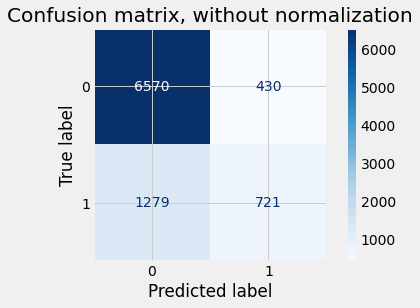

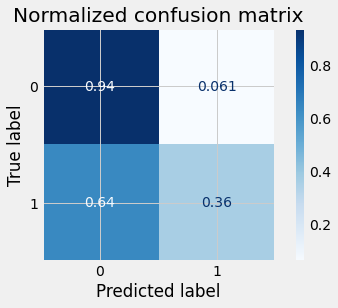

In [237]:
from sklearn.metrics import plot_confusion_matrix
#%% Confusion Matrix for RFC
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
np.set_printoptions(precision=2)

# Plot Both Confusion Matrix, without normalization and with normalization 
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(RFC,x_test_pc, y_test,
                                 display_labels=RFC.classes_,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

plt.show()

In [170]:
#%% Calculate Precision, Recall, F1-Score, and Accurarcy 
# https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9 

from sklearn.metrics import precision_recall_fscore_support
# predictions using RFC model given X_test20 data
y_pred = RFC.predict(x_test_pc)

# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html
# precision, recall, f1-score
precision_recall_fscore_support(y_test, y_pred, average='binary',pos_label=1,beta = 1)

# classification_report for Attrited Customer  
print(classification_report(y_test,y_pred))
print("Accuracy: %.2f%%" % (accuracy_score(y_test, y_pred)*100.0))
print("Recall: %.2f%%" % ((recall_score(y_test,y_pred))*100.0))

              precision    recall  f1-score   support

           0       0.84      0.94      0.88      7000
           1       0.63      0.36      0.46      2000

    accuracy                           0.81      9000
   macro avg       0.73      0.65      0.67      9000
weighted avg       0.79      0.81      0.79      9000

Accuracy: 81.01%
Recall: 36.05%


In [238]:
from sklearn.neighbors import KNeighborsClassifier

error_rate = []

for i in range(1, 40):
  knn = KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
  knn.fit(x_train, y_train)
  pred_i = knn.predict(x_test)
  error_rate.append(np.mean(pred_i!=y_test))

Text(0, 0.5, 'Error Rate')

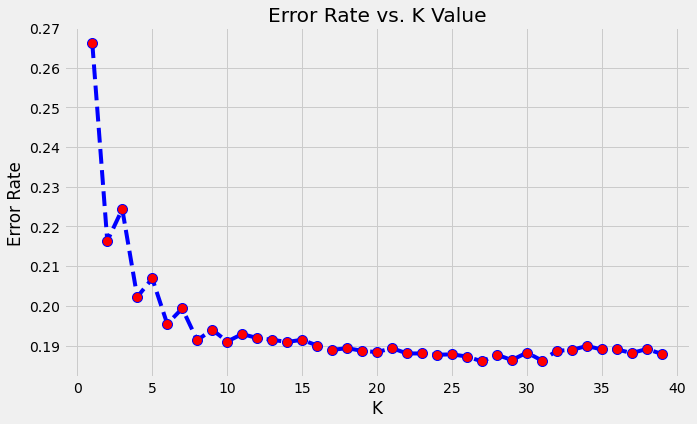

In [108]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [239]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [242]:
y_pred = knn.predict(x_test)

In [243]:
from sklearn.metrics import confusion_matrix
cm  = confusion_matrix(y_test, y_pred)

In [244]:
cm

array([[6506,  494],
       [1299,  701]])

In [111]:
roc = roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
pred = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

res = pd.DataFrame([['k-Nearest_neighbors', acc, prec, rec, f1, roc]],
columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 score', 'ROC'])

In [205]:

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=60 , sampling_strategy = 1.0)
x_train_sm , y_train_sm = sm.fit_resample(x_train, y_train)

In [206]:
x_train_sm

array([[-1.14, -1.23, -1.08, ..., -0.31, -0.31, -0.29],
       [-0.37, -1.23,  0.19, ...,  0.01, -0.12, -0.12],
       [-0.75,  0.81,  0.19, ..., -0.26, -0.25,  0.  ],
       ...,
       [-0.75,  0.81,  0.19, ..., -0.21, -0.29, -0.24],
       [-0.91, -1.23,  0.19, ..., -0.24, -0.24, -0.14],
       [-0.06,  0.81, -1.08, ..., -0.3 , -0.31, -0.29]])

In [209]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(random_state=69,
                              use_label_encoder=False, n_jobs=-1)

xgb_model.fit(x_train_sm, y_train_sm)

XGBClassifier(n_jobs=-1, random_state=69, use_label_encoder=False)

In [211]:

xgb_model.score(x_test, y_test)# Checking the Classification Report (Hidden Input)

print(classification_report(y_test, xgb_model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87      7000
           1       0.53      0.51      0.52      2000

    accuracy                           0.79      9000
   macro avg       0.70      0.69      0.69      9000
weighted avg       0.79      0.79      0.79      9000



In [217]:
!pip install scikit-plot

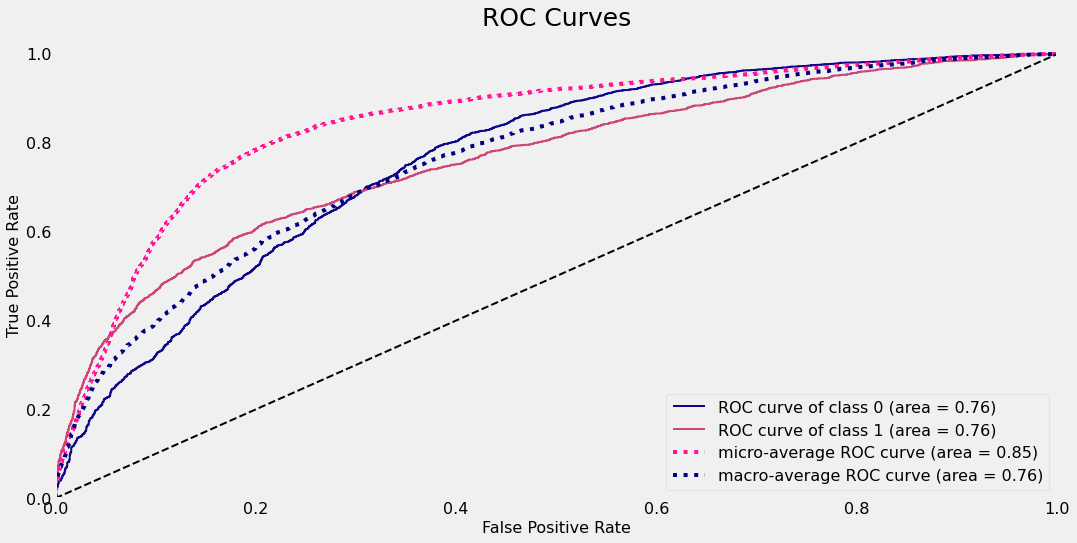

In [218]:
# Checking the roc_auc_curve (Hidden Input)
import scikitplot as skplt
y_true = y_test # ground truth labels
y_probas = xgb_model.predict_proba(x_test) # predicted probabilities generated by sklearn classifier

skplt.metrics.plot_roc(y_true, y_probas, figsize=(16,8), title_fontsize=25, text_fontsize=16, cmap='plasma')
plt.grid(False)
plt.show()

In [224]:
# Importing oversampler library
from collections import Counter
from imblearn.over_sampling import RandomOverSampler 

ros = ros = RandomOverSampler(random_state=42)

x_train_ros, y_train_ros = ros.fit_resample(x_train, y_train)


# Befor sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution 
print('New class distribution:-',Counter(y_train_ros))

Before sampling class distribution:- Counter({0: 16364, 1: 4636})
New class distribution:- Counter({0: 16364, 1: 16364})


In [225]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(random_state=69,
                              use_label_encoder=False, n_jobs=-1)

xgb_model.fit(x_train_ros, y_train_ros)

XGBClassifier(n_jobs=-1, random_state=69, use_label_encoder=False)

In [226]:
xgb_model.score(x_test, y_test)# Checking the Classification Report (Hidden Input)

print(classification_report(y_test, xgb_model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84      7000
           1       0.47      0.62      0.53      2000

    accuracy                           0.76      9000
   macro avg       0.67      0.71      0.68      9000
weighted avg       0.79      0.76      0.77      9000



In [227]:
y_pred = xgb_model.predict(x_test)

In [229]:
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report

cfm = confusion_matrix(y_test , y_pred)
print(cfm)

[[5592 1408]
 [ 767 1233]]


In [245]:
from sklearn.svm import SVC
svc  = SVC(kernel='rbf', random_state=0)
svc.fit(x_train_ros, y_train_ros)



SVC(random_state=0)

In [246]:
y_pred = svc.predict(x_test)

In [247]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

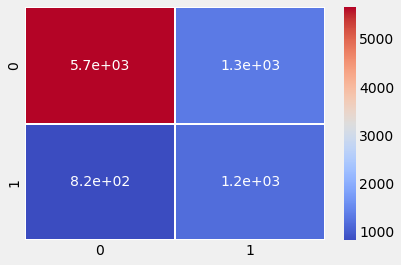

In [248]:
sns.heatmap(cm,annot= True,linewidths=1,cmap='coolwarm')

In [251]:
from sklearn.metrics import  accuracy_score, f1_score,  precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model = pd.DataFrame([['Support Vector Machine', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Support Vector Machine,0.760111,0.468515,0.5915,0.522873,0.699893
